<a href="https://colab.research.google.com/github/anikaemo/PythonLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install scikit-learn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('/content/nasdaq100.csv', sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [5]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [6]:
df.isnull().sum()

,0
Date,0
Starting (USD),0
Ending (USD),0


In [7]:
print(df.columns)

Index(['Date', 'Starting (USD)', 'Ending (USD)'], dtype='object')


In [8]:
df.drop('Date', axis=1, inplace=True, errors='ignore')
df

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


In [9]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'NASDAQ Stock Price')

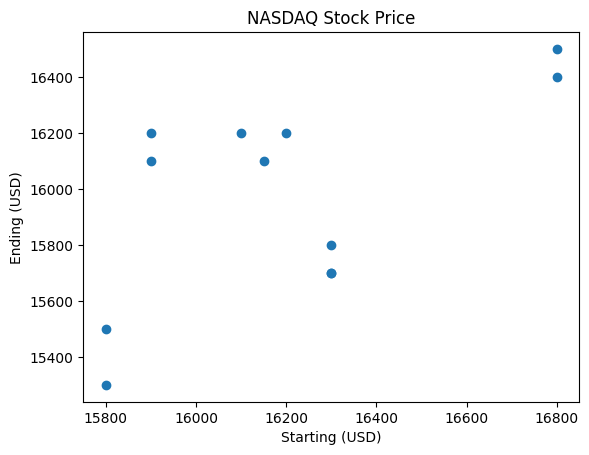

In [11]:
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ Stock Price')

In [12]:
x = df.drop('Ending (USD)',axis=1)
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [13]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


Linear Regression


In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [15]:
x.mean()

,0
Starting (USD),16195.833333


In [16]:
y.mean()

,0
Ending (USD),15975.0


Text(0.5, 1.0, 'NASDAQ Stock Price')

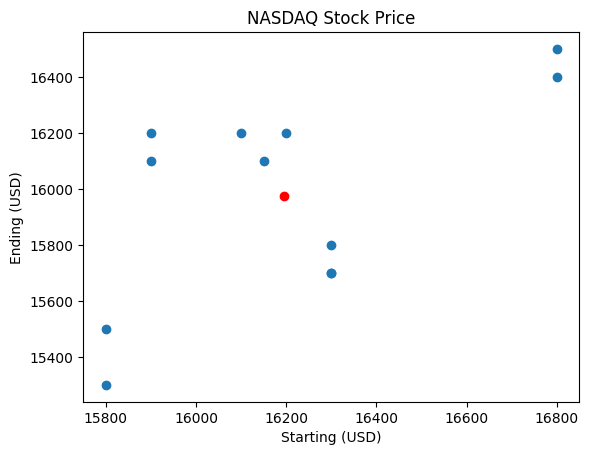

In [17]:
plt.scatter(x.mean(), y.mean(), color = 'red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ Stock Price')

In [18]:
reg.fit(x,y) #train the ml model


LinearRegression()

In [19]:
m = reg.coef_
m

array([[0.65258293]])

In [20]:
c = reg.intercept_
c

array([5405.87555702])

In [21]:
# y = mx + c

In [22]:
m*16700 + c

array([[16304.0105628]])

In [23]:
reg.predict([[16700]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [24]:
df['predicted_y'] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'NASDAQ Stock Price')

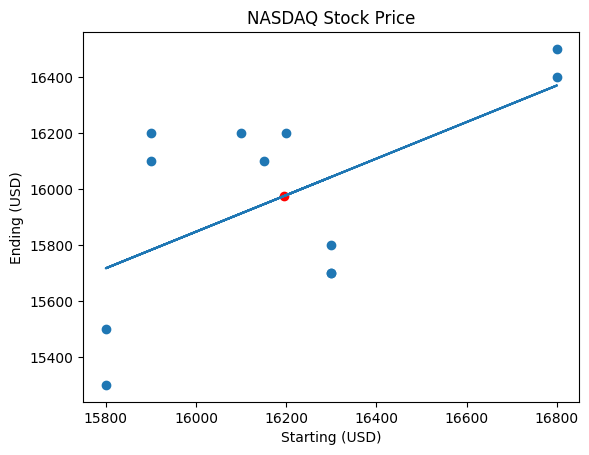

In [25]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color = 'red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ Stock Price')

In [26]:
reg.predict([[16700]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

**Lose & Cost Function

In [27]:
df['lose'] = df['Ending (USD)'] - df['predicted_y']
df.head()

,Starting (USD),Ending (USD),predicted_y,lose
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [ ]:
#MSE & MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [30]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(df['Ending (USD)'], df['predicted_y'])
print("Mean Squared Error:", MSE)

Mean Squared Error: 80411.23397700385


In [31]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(df['Ending (USD)'], df['predicted_y'])
print("Mean Squared Error:", MAE)

Mean Squared Error: 260.3840017604666


In [38]:
sum(abs(df['lose'])) / len(x)

260.3840017604666

In [39]:
reg.score(x,y)

0.3577804940272571

Text(0.5, 1.0, 'NASDAQ Stock Price')

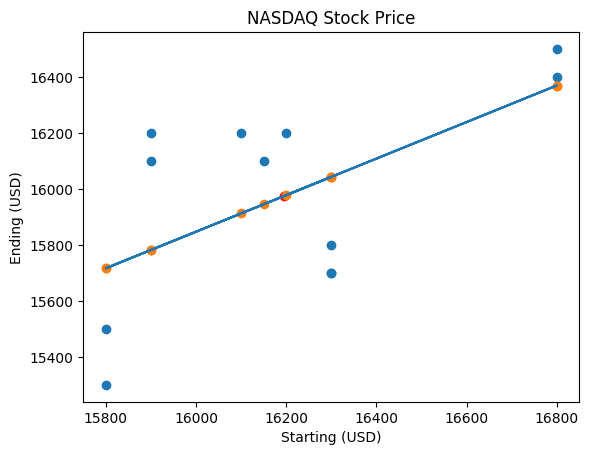

In [43]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color = 'red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.scatter(df['Starting (USD)'], reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ Stock Price')